In [1]:
pip install gensim

  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Users\wgkam\AppData\Local\Programs\Python\Python313\python.exe C:\Users\wgkam\AppData\Local\Temp\pip-install-b09ilktg\numpy_606c36a9465d443dbb84e98023383be2\vendored-meson\meson\meson.py setup C:\Users\wgkam\AppData\Local\Temp\pip-install-b09ilktg\numpy_606c36a9465d443dbb84e98023383be2 C:\Users\wgkam\AppData\Local\Temp\pip-install-b09ilktg\numpy_606c36a9465d443dbb84e98023383be2\.mesonpy-t643muf5 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\wgkam\AppData\Local\Temp\pip-install-b09ilktg\numpy_606c36a9465d443dbb84e98023383be2\.mesonpy-t643muf5\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\wgkam\AppData\Local\Temp\pip-install-b09ilktg\numpy_606c36a9465d443dbb84e98023383be2
      Build dir: C:\Users\wgkam\AppData\Local\Temp\pip-install-b09

In [2]:
pip install pot

  Using cached pot-0.9.5.tar.gz (440 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
      Traceback (most recent call last):
        File "c:\Users\wgkam\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "c:\Users\wgkam\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\wgkam\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\wgkam\AppData\Local\Temp\pip-build-env-fu45b2ct\overlay\Lib\site-packa

In [4]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [5]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [6]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [7]:
model.wv

In [8]:
import gensim.downloader

models = gensim.downloader.info()['models']

In [9]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [10]:
model.wv.most_similar('trees', topn=10)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922),
 ('response', -0.002765784738585353),
 ('user', -0.013535077683627605),
 ('graph', -0.023671654984354973),
 ('computer', -0.032843153923749924),
 ('system', -0.05234673619270325)]

In [11]:
model.wv.similarity('trees', 'graph')

-0.02367166

In [12]:
model.wv.doesnt_match(['minors', 'human', 'interface'])

'minors'

In [13]:
model.wv.distance('trees', 'graph')

1.0236716605722904

In [17]:
model.wv.wmdistance(['trees'], ['graph'])

1.4308540422347924

In [16]:
pip install pyemd

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 148.7/148.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
 
# Завантаження необхідних ресурсів
nltk.download('punkt')
nltk.download('stopwords')
 
# Початковий текст
texts = [
    "From the Quran: When you read the Quran, seek refuge with God from Satan the outcast. "
    "He has no authority over those who be­lieve and trust in their Lord. "
    "His authority is only over those who follow him, and those who associate others with Him. – Verses 16:98-100 ",
    
    "And give good news to those who be­lieve and do righteous deeds; "
    "that they will have gardens beneath which rivers flow. "
    "Whenever they are provided with fruit therefrom as sustenance, they will say, "
    "This is what we were provided with be­fore, and they will be given the like of it. "
    "And they will have pure spouses therein, and they will abide therein forever.",
    
    "How can you deny God, when you were dead and He gave you life, then He will put you to death, "
    "then He will bring you to life, then to Him you will be returned?"
]
 
# Ініціалізація об'єктів
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
 
tokenized_texts = []
 
for text in texts:
    # Видалення спеціальних символів та дефісів Unicode
    text = text.encode("utf-8", "ignore").decode("utf-8")
    text = text.replace("­", "")  # Видалення soft hyphen
 
    # Токенізація
    words = word_tokenize(text)
 
    # Нормалізація (приведення до нижнього регістру, видалення пунктуації, стоп-слів та стемінг)
    normalized_words = [
        ps.stem(word.lower().translate(str.maketrans("", "", string.punctuation)))
        for word in words if word.lower() not in stop_words and word.strip()
    ]
 
    # Об'єднання оброблених слів у текст
    normalized_text = " ".join(normalized_words)
    tokenized_texts.append(normalized_text)
 
# Вивід результату
print(tokenized_texts)

['quran  read quran  seek refug god satan outcast  author believ trust lord  author follow  associ other  – vers 1698100', 'give good news believ righteou deed  garden beneath river flow  whenev provid fruit therefrom susten  say  provid  given like  pure spous therein  abid therein forev ', 'deni god  dead gave life  put death  bring life  return ']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Viacheslav.Snoz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viacheslav.Snoz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Step 2: Organize and Save Corpus
corpus_dir = 'my_custom_corpus'
if not os.path.exists(corpus_dir):
    os.makedirs(corpus_dir)

# Write tokenized texts to separate files in the corpus directory
for i, text in enumerate(tokenized_texts):
    with open(os.path.join(corpus_dir, f'doc{i + 1}.txt'), 'w', encoding='utf-8') as file:
        file.write(text)


In [27]:
# Step 3: Create an NLTK Corpus Reader
corpus = PlaintextCorpusReader(corpus_dir, '.*\.txt')

print("Words in the corpus:")
print(corpus.words())


Words in the corpus:
['quran', 'read', 'quran', 'seek', 'refug', 'god', ...]


In [29]:
import pandas as pd

In [61]:
corpus.sents()

[['quran', 'read', 'quran', 'seek', 'refug', 'god', 'satan', 'outcast', 'author', 'believ', 'trust', 'lord', 'author', 'follow', 'associ', 'other', '–', 'vers', '1698100'], ['give', 'good', 'news', 'believ', 'righteou', 'deed', 'garden', 'beneath', 'river', 'flow', 'whenev', 'provid', 'fruit', 'therefrom', 'susten', 'say', 'provid', 'given', 'like', 'pure', 'spous', 'therein', 'abid', 'therein', 'forev'], ...]

In [62]:
model2 = Word2Vec(sentences=corpus.sents(), vector_size=100, window=5, min_count=1, workers=4)

In [63]:
corpus.words()[:2]

['quran', 'read']

In [64]:
model2.wv

In [65]:
models2 = gensim.downloader.info()['models']

In [83]:
model2.wv.most_similar('god', topn=100)

[('therefrom', 0.21231652796268463),
 ('news', 0.19915518164634705),
 ('1698100', 0.17302456498146057),
 ('put', 0.17119334638118744),
 ('author', 0.1700374037027359),
 ('deed', 0.1528489887714386),
 ('satan', 0.14877870678901672),
 ('believ', 0.14611877501010895),
 ('river', 0.1342608779668808),
 ('bring', 0.12176986783742905),
 ('like', 0.11222817748785019),
 ('deni', 0.0812373161315918),
 ('therein', 0.06432114541530609),
 ('forev', 0.06429155170917511),
 ('pure', 0.058468032628297806),
 ('garden', 0.053121089935302734),
 ('flow', 0.05134144052863121),
 ('vers', 0.046595413237810135),
 ('beneath', 0.040414586663246155),
 ('spous', 0.02359829656779766),
 ('abid', 0.018519744277000427),
 ('return', 0.013975282199680805),
 ('lord', 0.0016946179093793035),
 ('associ', -0.002355010714381933),
 ('gave', -0.007035036105662584),
 ('refug', -0.007498474791646004),
 ('provid', -0.012867622077465057),
 ('follow', -0.016941498965024948),
 ('trust', -0.019531577825546265),
 ('life', -0.023435948

In [67]:
model2.wv.similarity('quran', 'read')

-0.1320781

In [74]:
model2.wv.wmdistance(['quran'], ['read'])

1.5047113415867253

In [144]:
data = ['therefrom', 0.21231652796268463,
        'news', 0.19915518164634705,
        '1698100', 0.17302456498146057,
        'put', 0.17119334638118744,
        'author', 0.1700374037027359,
        'deed', 0.1528489887714386,
        'satan', 0.14877870678901672,
        'believ', 0.14611877501010895,
        'river', 0.1342608779668808,
        'bring', 0.12176986783742905,
        'like', 0.11222817748785019,
        'deni', 0.0812373161315918,
        'therein', 0.06432114541530609,
        'forev', 0.06429155170917511,
        'pure', 0.058468032628297806,
        'garden', 0.053121089935302734,
        'flow', 0.05134144052863121,
        'vers', 0.046595413237810135,
        'beneath', 0.040414586663246155,
        'spous', 0.02359829656779766,
        'abid', 0.018519744277000427,
        'return', 0.013975282199680805,
        'lord', 0.0016946179093793035,
        'associ', -0.002355010714381933,
        'gave', -0.007035036105662584,
        'refug', -0.007498474791646004,
        'provid', -0.012867622077465057,
        'follow', -0.016941498965024948,
        'trust', -0.019531577825546265,
        'life', -0.02343594841659069,
        'good', -0.032813336700201035,
        'death', -0.03450440242886543,
        'outcast', -0.03503049537539482,
        'quran', -0.05197468772530556,
        'righteou', -0.08457213640213013,
        'given', -0.08639150112867355,
        'give', -0.10193785279989243,
        'fruit', -0.10552576184272766,
        'susten', -0.10712086409330368,
        'dead', -0.11181976646184921,
        '–', -0.13528163731098175,
        'say', -0.13963887095451355,
        'whenev', -0.15307879447937012,
        'other', -0.1851746290922165,
        'read', -0.21531939506530762,
        'seek', -0.22738268971443176]

numbers = []
strings = []

for item in data:
    if isinstance(item, ((float))):
        numbers.append(item)
    elif isinstance(item, str):
        strings.append(item)

print("Числа:", numbers)
print("Рядки:", strings)

Числа: [0.21231652796268463, 0.19915518164634705, 0.17302456498146057, 0.17119334638118744, 0.1700374037027359, 0.1528489887714386, 0.14877870678901672, 0.14611877501010895, 0.1342608779668808, 0.12176986783742905, 0.11222817748785019, 0.0812373161315918, 0.06432114541530609, 0.06429155170917511, 0.058468032628297806, 0.053121089935302734, 0.05134144052863121, 0.046595413237810135, 0.040414586663246155, 0.02359829656779766, 0.018519744277000427, 0.013975282199680805, 0.0016946179093793035, -0.002355010714381933, -0.007035036105662584, -0.007498474791646004, -0.012867622077465057, -0.016941498965024948, -0.019531577825546265, -0.02343594841659069, -0.032813336700201035, -0.03450440242886543, -0.03503049537539482, -0.05197468772530556, -0.08457213640213013, -0.08639150112867355, -0.10193785279989243, -0.10552576184272766, -0.10712086409330368, -0.11181976646184921, -0.13528163731098175, -0.13963887095451355, -0.15307879447937012, -0.1851746290922165, -0.21531939506530762, -0.227382689714

In [140]:
type(data)

list

In [145]:
vis = pd.DataFrame({
    "Похибка": [0.21231652796268463, 0.19915518164634705, 0.17302456498146057, 0.17119334638118744, 0.1700374037027359, 0.1528489887714386, 0.14877870678901672, 0.14611877501010895, 0.1342608779668808, 0.12176986783742905, 0.11222817748785019, 0.0812373161315918, 0.06432114541530609, 0.06429155170917511, 0.058468032628297806, 0.053121089935302734, 0.05134144052863121, 0.046595413237810135, 0.040414586663246155, 0.02359829656779766, 0.018519744277000427, 0.013975282199680805, 0.0016946179093793035, -0.002355010714381933, -0.007035036105662584, -0.007498474791646004, -0.012867622077465057, -0.016941498965024948, -0.019531577825546265, -0.02343594841659069, -0.032813336700201035, -0.03450440242886543, -0.03503049537539482, -0.05197468772530556, -0.08457213640213013, -0.08639150112867355, -0.10193785279989243, -0.10552576184272766, -0.10712086409330368, -0.11181976646184921, -0.13528163731098175, -0.13963887095451355, -0.15307879447937012, -0.1851746290922165, -0.21531939506530762, -0.22738268971443176],
    "Слово": ['therefrom', 'news', '1698100', 'put', 'author', 'deed', 'satan', 'believ', 'river', 'bring', 'like', 'deni', 'therein', 'forev', 'pure', 'garden', 'flow', 'vers', 'beneath', 'spous', 'abid', 'return', 'lord', 'associ', 'gave', 'refug', 'provid', 'follow', 'trust', 'life', 'good', 'death', 'outcast', 'quran', 'righteou', 'given', 'give', 'fruit', 'susten', 'dead', '–', 'say', 'whenev', 'other', 'read', 'seek']
})

<Axes: >

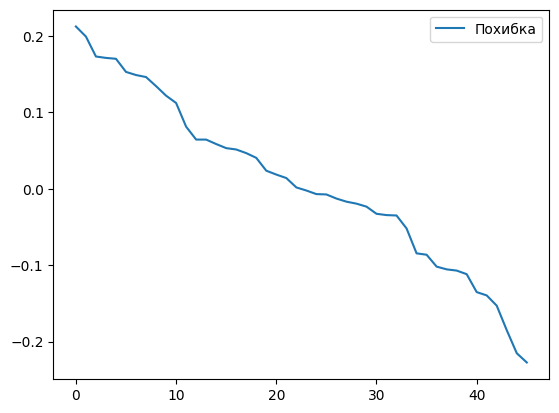

In [146]:
vis.plot()